In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from keras.models import Model
import keras
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2

The data proveded in part 3 is completely jumbled up.
Augmentation over here would be redundant as the data is not of correct form

In [1]:
# fetching the data from drive

Data can be found [here](https://drive.google.com/file/d/1_SRtYsC8jj4SxfBmNs07uHQWbk3PYARb/view?usp=sharing)

In [15]:
!unzip /content/drive/MyDrive/midas/mnistTask3.zip

Streaming output truncated to the last 5000 lines.
 extracting: mnistTask/3/image_021488.jpg  
 extracting: mnistTask/3/image_047540.jpg  
 extracting: mnistTask/3/image_050475.jpg  
 extracting: mnistTask/3/image_024391.jpg  
 extracting: mnistTask/3/image_020193.jpg  
 extracting: mnistTask/3/image_004447.jpg  
 extracting: mnistTask/3/image_051601.jpg  
 extracting: mnistTask/3/image_009900.jpg  
 extracting: mnistTask/3/image_020916.jpg  
 extracting: mnistTask/3/image_025962.jpg  
 extracting: mnistTask/3/image_054889.jpg  
 extracting: mnistTask/3/image_012369.jpg  
 extracting: mnistTask/3/image_025528.jpg  
 extracting: mnistTask/3/image_035609.jpg  
 extracting: mnistTask/3/image_037469.jpg  
 extracting: mnistTask/3/image_057560.jpg  
 extracting: mnistTask/3/image_000119.jpg  
 extracting: mnistTask/3/image_020120.jpg  
 extracting: mnistTask/3/image_044129.jpg  
 extracting: mnistTask/3/image_027779.jpg  
 extracting: mnistTask/3/image_058235.jpg  
 extracting: mnistTask/3/

ImageDataGen from keras to perform minimum augmentation and load the data. Resizing to 100x100 as well

In [16]:
directory = '/content/mnistTask'

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,
        validation_split=0.2# randomly shift images vertically (fraction of total height)
        )

# Limit the size of the image to 100x100 pixels
tds = datagen.flow_from_directory(
    directory=directory,
    target_size=(100, 100),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset="training",
    interpolation="nearest"
)

testds = datagen.flow_from_directory(
    directory=directory,
    target_size=(100, 100),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset="validation",
    interpolation="nearest",
)

Found 48006 images belonging to 10 classes.
Found 11994 images belonging to 10 classes.


The data is mixed up as here we can see the data in the directory for 0 is :

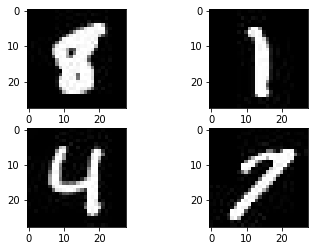

In [29]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cv2.imread('mnistTask/0/'+'image_008465.jpg'))
axarr[0,1].imshow(cv2.imread('mnistTask/0/'+'image_046254.jpg'))
axarr[1,0].imshow(cv2.imread('mnistTask/0/'+'image_008768.jpg'))
axarr[1,1].imshow(cv2.imread('mnistTask/0/'+'image_030109.jpg'))

Let us train this model from scratch using our Network

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (100, 100, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))  

Regardless of the tweaking the validation loss fails to converge. This is because of the data being faulty.

In [13]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/midas/model_check/part_3.hdf5",
                                                 save_best_only=True,
                                                 verbose=1)
history = model.fit(tds, epochs = 50, validation_data = testds, batch_size = 32,
                    verbose = 1, callbacks=cp_callback)


Epoch 1/50
1501/1501 [==============================] - 120s 59ms/step - loss: 2.3166 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.1005

Epoch 00001: val_loss improved from inf to 2.30253, saving model to /content/drive/MyDrive/midas/model_check/part_3.hdf5
Epoch 2/50
1501/1501 [==============================] - 88s 59ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3025 - val_accuracy: 0.1021

Epoch 00002: val_loss improved from 2.30253 to 2.30246, saving model to /content/drive/MyDrive/midas/model_check/part_3.hdf5
Epoch 3/50
1501/1501 [==============================] - 87s 58ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3025 - val_accuracy: 0.1021

Epoch 00003: val_loss did not improve from 2.30246
Epoch 4/50
1501/1501 [==============================] - 87s 58ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3022 - val_accuracy: 0.1021

Epoch 00004: val_loss improved from 2.30246 to 2.30225, saving model to /content/drive/MyDrive/midas/model_check/p

The above model can be found [here](https://drive.google.com/file/d/1y1akKzqJLv_HwXqCocavGP8NOkq-JymE/view?usp=sharing).

In [16]:
mnist_model = keras.models.load_model('/content/drive/MyDrive/midas/model_check/part_3.hdf5')

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [23]:
def extract_features(image_data=None):
  data = []
  for i in image_data:
    x = cv2.resize(i, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    x = np.expand_dims(x, axis=2)
    x = np.array(x, dtype='float64')
    data.append(x)
  return np.asarray(data)
    
  
resized_x_train = extract_features(image_data=x_train)
resized_x_test = extract_features(image_data=x_test)
resized_y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
resized_y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

Evaluating on the mnist datset, we see the model performs extremely badly. It correctly predicts 5 out of 10000 data points.
This model does a good job at completely predicting the wrong value.

In [19]:
y_pred = np.argmax(mnist_model.predict(resized_x_test), axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.00     10000
   macro avg       0.00      0.00      0.00     10000
weighted avg       0.00      0.00      0.00     10000



As noted in `part_2.ipynb` the model performs with an accuracy of 18% when initialized randomly. This is much better than when trained on the faulty dataset.

As mentioned from the requirements, first we trained on pretraned weights from part 2 (0-9 images from the dataset provided) which provided an accuracy of almost 0% having to wrongly predict every single data point, then we trained on a randomly initilized model to achieve an accuracy sore of 18%. 

We shall now train this new data, now we shall train with the same model (62 classes provieded in part 1) that was produced in part 1 by changing the output layers to produce 10 classes instead of 62 and then test it on the MNIST dataset.

In [1]:
from keras.models import load_model

In [8]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (100, 100, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(LeakyReLU(alpha=0.3))

# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation = "relu"))
model.add(Dense(62, activation = "softmax"))

Loading the weights from part 1

In [9]:
model.load_weights('/content/drive/MyDrive/midas/model_check/62class.hdf5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 64)        0

In [13]:
flat1 = Flatten()(model.layers[-6].output)
class1 = Dense(128)(flat1)
activ1 = LeakyReLU(alpha=0.3)(class1)
dp1 = Dropout(0.2)(activ1)
class2 = Dense(32)(dp1)
dp2 = Dropout(0.2)(class2)
activ2= LeakyReLU(alpha=0.3)(dp2)
output = Dense(10, activation='softmax')(activ2)
new_model = Model(inputs=model.inputs, outputs=output)

Removing the last 5 layers and adding new dense layers with a an output layer of 10 nodes

In [14]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1849

As we can see, even here, the model doesn't seem to be performing well. The randomly divided data throws the model off to a massive extent preventing it from learning anything due to the mix in data

In [18]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

new_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/midas/model_check/Training_on_part1.hdf5",
                                                 save_best_only=True,
                                                 verbose=1)

history = new_model.fit(tds, epochs = 25, validation_data = testds, batch_size = 32,
                    verbose = 1, callbacks=cp_callback)


Epoch 1/25
1501/1501 [==============================] - 116s 55ms/step - loss: 2.3547 - accuracy: 0.1091 - val_loss: 2.2914 - val_accuracy: 0.1109

Epoch 00001: val_loss improved from inf to 2.29144, saving model to /content/drive/MyDrive/midas/model_check/Training_on_part1.hdf5
Epoch 2/25
1501/1501 [==============================] - 80s 53ms/step - loss: 2.2937 - accuracy: 0.1091 - val_loss: 2.2758 - val_accuracy: 0.1090

Epoch 00002: val_loss improved from 2.29144 to 2.27578, saving model to /content/drive/MyDrive/midas/model_check/Training_on_part1.hdf5
Epoch 3/25
1501/1501 [==============================] - 80s 53ms/step - loss: 2.2813 - accuracy: 0.1114 - val_loss: 2.2611 - val_accuracy: 0.1149

Epoch 00003: val_loss improved from 2.27578 to 2.26113, saving model to /content/drive/MyDrive/midas/model_check/Training_on_part1.hdf5
Epoch 4/25
1501/1501 [==============================] - 79s 53ms/step - loss: 2.2693 - accuracy: 0.1101 - val_loss: 2.2556 - val_accuracy: 0.1136

Epoch 0

The model can be found [here](https://drive.google.com/file/d/18mAzwiAybtdUhOatj-9BA2QkOVYbwe0O/view?usp=sharing)

Same issue with the model that we trained here, due to the faulty data. We get terrible accuracy. The model fails to converge and `val_loss` plateaus at 2.2

In [24]:
y_pred = np.argmax(new_model.predict(resized_x_test), axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.00     10000
   macro avg       0.00      0.00      0.00     10000
weighted avg       0.00      0.00      0.00     10000

